# J Component- **CSE-3019 Data Mining**.

# *`Yelp Recommender System`*


*   **16BIS0083 (Rajdeep Debgupta)**
*   **16BIS0002 (Varun Aggarwal)**

*   **16BIS0018 (Vipul Jindal)**
*   **16BIS0179 (Anirudh Aggarwal)**







Importing the required libraries

In [0]:
import pandas as pd
from six.moves import cPickle
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

Building server authentication to kaggle dataset repository by uploading json key for a user.

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajdeep04","key":"0734dd7d4482886fbd455d6ef4c20278"}'}

Setting up the directory to kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading the datasets:

In [0]:
!kaggle datasets download -d z5025122/yelp-csv

 99% 345M/348M [00:04<00:00, 117MB/s] 
100% 348M/348M [00:04<00:00, 75.7MB/s]


In [0]:
!unzip yelp-csv.zip

Archive:  yelp-csv.zip
  inflating: yelp_academic_dataset_review.csv  
  inflating: yelp_academic_dataset_business.csv  


In [0]:
!kaggle datasets download -d luisfredgs/yelp-reviews-csv

 82% 1.20G/1.47G [00:12<00:01, 148MB/s]User cancelled operation


In [0]:
!unzip yelp-reviews-csv.zip

unzip:  cannot find or open yelp-reviews-csv.zip, yelp-reviews-csv.zip.zip or yelp-reviews-csv.zip.ZIP.


In [0]:
df_full=pd.read_csv('yelp_academic_dataset_review.csv')

In [0]:
df_full.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2


In [0]:
df_bus=pd.read_csv('yelp_academic_dataset_business.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,8,15,18,21,27,30,43,49,52,62,64,66,70,84,89,92,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_bus.head()

,business_id,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,...,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Hair Types Specialized In.perms,attributes.Music.jukebox,attributes.Ambience.upscale
0,vcNAWiLM4dR7D2nwwJ7nCA,NaN,NaN,NaN,8:00,NaN,NaN,NaN,NaN,8:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JwUE5GmEO-sH1FuwJgKBlQ,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
2,uGykseHzyS5xAMWoN6YUqA,False,NaN,NaN,6:00,NaN,NaN,NaN,NaN,6:00,...,NaN,casual,NaN,True,NaN,NaN,False,NaN,NaN,False
3,LRKJF43s9-3jG9Lgx4zODg,NaN,NaN,NaN,10:30,NaN,NaN,NaN,NaN,10:30,...,NaN,casual,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,RgDg-k9S5YD_BaxMckifkg,NaN,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,...,NaN,casual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print("Columns in business data file are:")
for i in df_bus.columns:
    print(i)

Columns in business data file are:
business_id
attributes.Ambience.divey
attributes.Dietary Restrictions.vegan
attributes.Happy Hour
hours.Thursday.open
attributes.Order at Counter
attributes.Hair Types Specialized In.africanamerican
attributes.Hair Types Specialized In.kids
attributes.BYOB
hours.Friday.open
categories
latitude
attributes.Outdoor Seating
attributes.Alcohol
attributes.Ambience.classy
attributes.Payment Types.mastercard
attributes.Parking.lot
attributes.Ambience.touristy
attributes.Corkage
hours.Tuesday.open
attributes.Good For.brunch
attributes.Payment Types.amex
name
hours.Monday.open
attributes.Waiter Service
attributes.Parking.street
attributes.Ambience.hipster
attributes.BYOB/Corkage
attributes.Hair Types Specialized In.straightperms
attributes.Music.live
attributes.Dietary Restrictions.dairy-free
attributes.Music.background_music
attributes.Price Range
attributes.Good For.breakfast
attributes.Parking.garage
attributes.Music.karaoke
attributes.Good For Dancing
revie

# **2. Data Exploration, Data Cleaning and Matrix Building**

## 2.a. Number of businesses in each city:

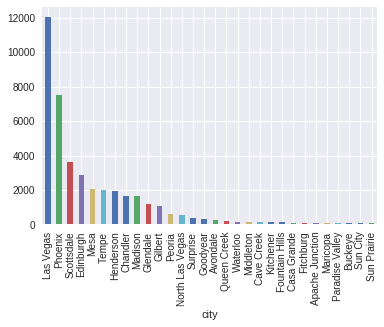

In [0]:
df_bus_groups = df_bus.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

## 2.b. Different Type of Businesses and their Count:¶

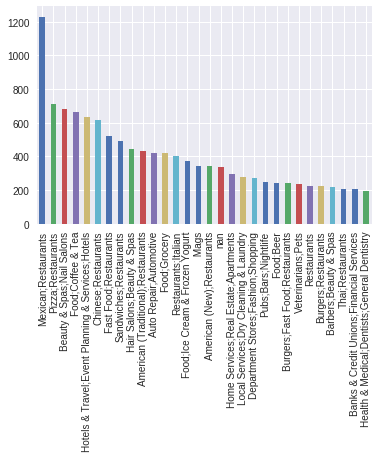

In [0]:
uniq_cat_dict = {}
for i in df_bus.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')

## 2.c. Business and City Ordered pairs and their count:

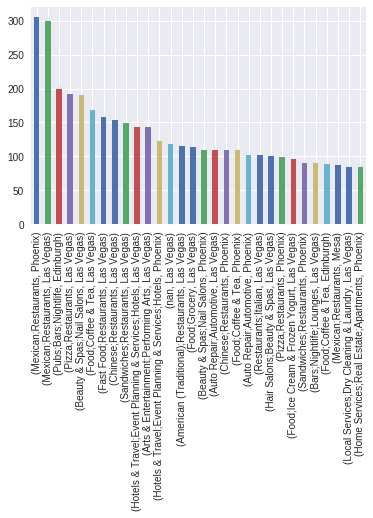

In [0]:
business_city = {}
n = len(df_bus)
for i in range(n):
    k1 = str(df_bus.categories.iloc[i]).split(',')
    k2 = df_bus.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')

### Inferences from 2.a, 2.b and 2.c

It can be seen that most of the businesses listed on the Yelp are Restaurants, Shopping places and Recreational Centers. For this given data set (obtained from Yelp's Website), top cities with maximum businesses are Las Vegas, Phoenix, and Scottsdale.

## 2.d. Cleaning the review data

Dropping the unwanted columns like 'text': review text, 'useful': Number of people rated it useful, 'date',etc. The columns left are 'user_id', 'business_id' and 'stars'.

In [0]:
df_reduced = df_full.drop(['text','votes.useful','votes.cool', 'date', 'votes.funny'], axis = 1)
df_reduced.head()

,user_id,review_id,business_id,stars,type
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,vcNAWiLM4dR7D2nwwJ7nCA,5,review
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,vcNAWiLM4dR7D2nwwJ7nCA,2,review
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,vcNAWiLM4dR7D2nwwJ7nCA,4,review
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,vcNAWiLM4dR7D2nwwJ7nCA,4,review
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,vcNAWiLM4dR7D2nwwJ7nCA,4,review


## 2.e. Merging the business data with the review data

Merging the business data and the review data on the 'business_id'. Information like 'city' of the business and 'categories' of the business were taken from the business data file.

In [0]:
df_merged = df_reduced.merge(df_bus[['city','categories', 'business_id']], how = 'outer', on= 'business_id')
df_merged.head()

,user_id,review_id,business_id,stars,type,city,categories
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,vcNAWiLM4dR7D2nwwJ7nCA,5.0,review,Phoenix,Doctors;Health & Medical
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,vcNAWiLM4dR7D2nwwJ7nCA,2.0,review,Phoenix,Doctors;Health & Medical
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,vcNAWiLM4dR7D2nwwJ7nCA,4.0,review,Phoenix,Doctors;Health & Medical
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,vcNAWiLM4dR7D2nwwJ7nCA,4.0,review,Phoenix,Doctors;Health & Medical
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,vcNAWiLM4dR7D2nwwJ7nCA,4.0,review,Phoenix,Doctors;Health & Medical


In [0]:
df_cleaned = df_merged.dropna()

## 2.f. Getting the top Business and City for which highest number of reviews are obtained¶

In [0]:
def topm_num_reviews_for_city_n_biz(df,m):
    business_city_count = {}
    n = len(df)
    for i in range(n):
        k1 = str(df.categories.iloc[i]).split(',')
        k2 = df.city.iloc[i]
        for j in k1:
            k = (j,k2)
            if k not in business_city_count.keys():
                business_city_count[k] = 1
            else:
                business_city_count[k] += 1
    business_city_count_series = pd.Series(business_city_count)
    business_city_count_series.sort_values(ascending = False, inplace = True)
    return business_city_count_series

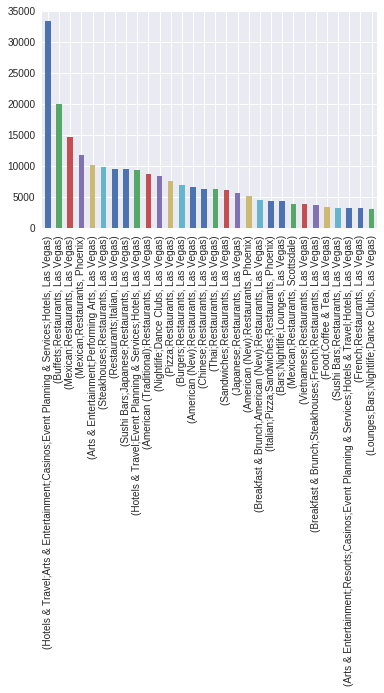

In [0]:
review_business_city = topm_num_reviews_for_city_n_biz(df_cleaned,10)
review_business_city[:30].plot(kind = 'bar')

In [0]:
rest_phoenix_reviews = df_cleaned[(df_cleaned.city == 'Phoenix') & (df_cleaned.categories.str.contains('.Restaurant.', case= False))]
rest_phoenix_reviews.shape

(114865, 7)

In [0]:
rest_Scottsdale_reviews = df_cleaned[(df_cleaned.city == 'Scottsdale') & (df_cleaned.categories.str.contains('.Restaurant.', case= False))]
rest_Scottsdale_reviews.shape

(63075, 7)

In [0]:
def get_clean_df(df, min_user_review = 30, min_res_review = 0, cols = ['user_id', 'business_id', 'stars']):
    '''Cleans the df and gets rid of the unwanted cols and also allows to filter the user and business based on the min number of reviews received'''
    df_new = df[cols]
    df_new.dropna(axis = 0, how = 'any', inplace = True)
    df_new[cols[1]+'_freq'] = df_new.groupby(cols[1])[cols[1]].transform('count')
    df_clean = df_new[df_new[cols[1]+'_freq']>=min_res_review]
    df_clean[cols[0]+'_freq'] = df_clean.groupby(cols[0])[cols[0]].transform('count')
    df_clean_2 = df_clean[df_clean[cols[0]+'_freq']>=min_user_review]
    return df_clean_2

In [0]:
def get_sparsity(sparse_matrix):
    return 1 - sparse_matrix.nnz/(sparse_matrix.shape[0]*sparse_matrix.shape[1])

Defining sparse matrix:

In [0]:
def get_sparse_matrix(df):
    '''Converts the df into a sparse ratings matrix'''
    unique_users = list(df['user_id'].unique())
    unique_bus = list(df['business_id'].unique())
    data = df['stars'].tolist()
    row = df['user_id'].astype('category', categories=unique_users).cat.codes
    col = df['business_id'].astype('category', categories=unique_bus).cat.codes
    sparse_matrix = csr_matrix((data, (row, col)), shape=(len(unique_users), len(unique_bus)))
    return sparse_matrix

In [0]:
u_20_phx = get_sparse_matrix(get_clean_df(rest_phoenix_reviews, min_user_review=20))
u_30_phx = get_sparse_matrix(get_clean_df(rest_phoenix_reviews, min_user_review=30))
print(get_sparsity(u_20_phx))
print(get_sparsity(u_30_phx))
print(u_20_phx.shape)
print(u_30_phx.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a Categorical

0.9818778076668103
0.9745633107311321
(773, 2129)
(424, 2048)


In [0]:
user_min_10_phoenix_res = get_clean_df(rest_phoenix_reviews, min_user_review=10)
print("Number of Reviews for Restaurants in Phoenix: ", user_min_10_phoenix_res.shape[0])
user_min_10_Scottsdale_res = get_clean_df(rest_Scottsdale_reviews, min_user_review=10)
print("Number of Reviews for Restaurants in Scottsdale: ", user_min_10_Scottsdale_res.shape[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Number of Reviews for Restaurants in Phoenix:  48818
Number of Reviews for Restaurants in Scottsdale:  21425


In [0]:
print("Unique Restaurants in Phoenix =",len(user_min_10_phoenix_res.business_id.unique()))
print("Unique Users in Phoenix =",len(user_min_10_phoenix_res.user_id.unique()))
print("Unique Restaurants in Scottsdale =",len(user_min_10_Scottsdale_res.business_id.unique()))
print("Unique Users in Scottsdale =",len(user_min_10_Scottsdale_res.user_id.unique()))

Unique Restaurants in Phoenix = 2227
Unique Users in Phoenix = 2015
Unique Restaurants in Scottsdale = 910
Unique Users in Scottsdale = 949


In [0]:
sm_user_10_phoenix_rest = get_sparse_matrix(user_min_10_phoenix_res)
print("Shape of ratings matrix for Restaurants in Phoenix =",sm_user_10_phoenix_rest.shape)
sm_user_10_Scottsdale_rest = get_sparse_matrix(user_min_10_Scottsdale_res)
print("Shape of ratings matrix for Restaurants in Scottsdale =",sm_user_10_Scottsdale_rest.shape)

Shape of ratings matrix for Restaurants in Phoenix = (2015, 2227)
Shape of ratings matrix for Restaurants in Scottsdale = (949, 910)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  import sys


In [0]:
sparsity_phoenix = 1 - sm_user_10_phoenix_rest.nnz/(sm_user_10_phoenix_rest.shape[0]*sm_user_10_phoenix_rest.shape[1])
sparsity_Scottsdale = 1 - sm_user_10_Scottsdale_rest.nnz/(sm_user_10_Scottsdale_rest.shape[0]*sm_user_10_Scottsdale_rest.shape[1])
print("Sparsity of ratings matrix for Restaurants in Phoenix = ", sparsity_phoenix)
print("Sparsity of ratings matrix for Restaurants in Scottsdale = ", sparsity_Scottsdale)

Sparsity of ratings matrix for Restaurants in Phoenix =  0.989887028249066
Sparsity of ratings matrix for Restaurants in Scottsdale =  0.9768883382160516


In [0]:
def train_val_test_split(sparse_matrix, num_review_val = 2, num_review_test = 2):
    '''Split the rating matrix into train ,val, and test marix that are disjoint matrices'''
    nzrows, nzcols =  sparse_matrix.nonzero()
    sparse_matrix_test = csr_matrix(sparse_matrix.shape)
    sparse_matrix_val = csr_matrix(sparse_matrix.shape)
    sparse_matrix_train = sparse_matrix.copy()
    n_users = sparse_matrix.shape[0]
    for u in range(n_users):
        idx = nzcols[np.where(nzrows == u)]
        np.random.shuffle(idx)
        test_idx = idx[-num_review_test:]
        val_idx = idx[-(num_review_val+num_review_test):-num_review_test]
        train_idx = idx[:-(num_review_val+num_review_test)]
        sparse_matrix_test[u,test_idx] = sparse_matrix[u,test_idx]
        sparse_matrix_val[u,val_idx] = sparse_matrix[u,val_idx]
        sparse_matrix_train[u,test_idx] = 0
        sparse_matrix_train[u,val_idx] = 0
    data = np.array(sparse_matrix_train[sparse_matrix_train.nonzero()])[0]
    row = sparse_matrix_train.nonzero()[0]
    col = sparse_matrix_train.nonzero()[1]
    size = sparse_matrix_train.shape
    sparse_matrix_train = csr_matrix((data,(row,col)),shape = size)
    mult = sparse_matrix_train.multiply(sparse_matrix_val)
    mmult = mult.multiply(sparse_matrix_test)
    assert(mmult.nnz == 0)
    return sparse_matrix_train, sparse_matrix_val, sparse_matrix_test

In [0]:
sm_u_10_phx_res_train, sm_u_10_phx_res_val, sm_u_10_phx_res_test = train_val_test_split(sm_user_10_phoenix_rest)
sm_u_10_sct_res_train, sm_u_10_sct_res_val, sm_u_10_sct_res_test =  train_val_test_split(sm_user_10_Scottsdale_rest)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [0]:
print(sm_u_10_phx_res_train.nnz, sm_u_10_phx_res_val.nnz, sm_u_10_phx_res_test.nnz)
print(sm_u_10_sct_res_train.nnz, sm_u_10_sct_res_val.nnz, sm_u_10_sct_res_test.nnz)

37321 4030 4030
16163 1898 1898


In [0]:
u_20_train, u_20_val, u_20_test = train_val_test_split(u_20_phx, num_review_val= 7, num_review_test= 3)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


# 3. Model Building:

## 3.1 SVD

**For Restaurants in Phoenix**

In [0]:
U_phx_res, S_phx_res, Vt_phx_res = np.linalg.svd(sm_u_10_phx_res_train.todense())#k = min(sm_u_10_phx_res_train.shape)-1)

In [0]:
print("smallest singular value = ",min(S_phx_res))
print("largest singular value = ",max(S_phx_res))
S_phx_res_dia = np.diag(S_phx_res)

smallest singular value =  0.0005320143386830581
largest singular value =  227.95077228234675


**Printing top 20 singular values**

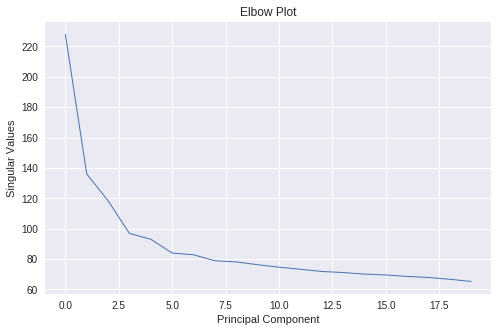

In [0]:
fig = plt.figure(figsize=(8,5))
plt.plot(S_phx_res[:20], '-', linewidth=1)
plt.title('Elbow Plot')
# plt.xticks(np.arange(0, S_phx_res.shape[0]+1, 50), rotation='vertical')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

**For Restaurants in Scottsdale**

In [0]:
U_sct_res, S_sct_res, Vt_sct_res = np.linalg.svd(sm_u_10_sct_res_train.todense())#k = min(sm_u_10_phx_res_train.shape)-1)

In [0]:
print("smallest singular value = ",min(S_sct_res))
print("largest singular value = ",max(S_sct_res))
S_sct_res_dia = np.diag(S_sct_res)

smallest singular value =  1.3437555356143498e-14
largest singular value =  171.86657448472008



**Printing top 20 singular values**

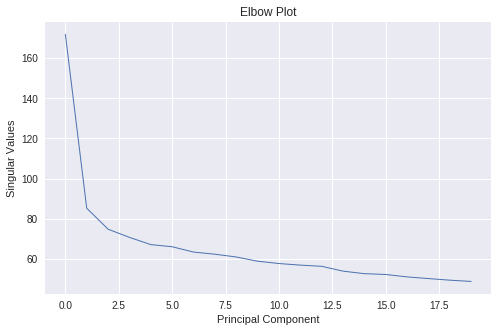

In [0]:
fig = plt.figure(figsize=(8,5))
plt.plot(S_sct_res[:20], '-', linewidth=1)
plt.title('Elbow Plot')
# plt.xticks(np.arange(0, S_phx_res.shape[0]+1, 50), rotation='vertical')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

Approimate error function:

In [0]:
def approx_err(k, A, U, S, Vt):
    rec_A = np.dot(U[:, :k], np.dot(S[:k,:k], Vt[:k, :]))
    idx = np.where(A>0);
    diff = A[idx] - rec_A[idx]
    return np.linalg.norm(diff)**2/diff.shape[1]


## For Restaurants in Phoenix

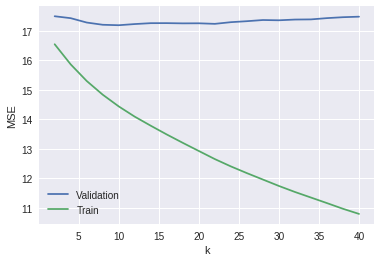

In [0]:
k = np.linspace(2,40,20, dtype = int)
errors_svd_val = {}
errors_svd_train = {}
for i in k:
    errors_svd_val[i] = approx_err(i, sm_u_10_phx_res_val.todense(), U_phx_res, S_phx_res_dia, Vt_phx_res)
    errors_svd_train[i] = approx_err(i, sm_u_10_phx_res_train.todense(), U_phx_res, S_phx_res_dia, Vt_phx_res)

plt.plot(errors_svd_val.keys(),errors_svd_val.values(), label = 'Validation')
plt.plot(errors_svd_train.keys(),errors_svd_train.values(), label = 'Train')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()

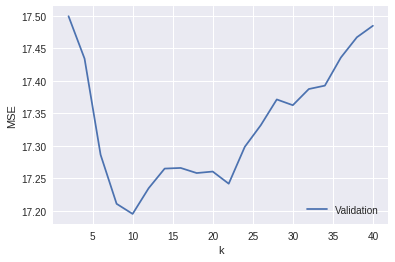

In [0]:
##Separately plotting the Validation error
plt.plot(errors_svd_val.keys(),errors_svd_val.values(), label = 'Validation')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.legend()

Text(0, 0.5, 'Principal Component 2')

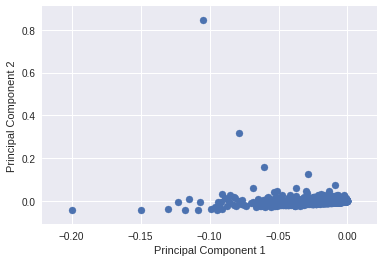

In [0]:
plt.scatter(np.ravel(U_phx_res[:,0]),np.ravel(U_phx_res[:,1]), label = 'Scatter plot for first two PCs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

**Best Validation MSE for SVD**

In [0]:
Best_Val_MSE_SVD_Phx = approx_err(10, sm_u_10_phx_res_val.todense(), U_phx_res, S_phx_res_dia, Vt_phx_res)
print('Best Validation MSE for SVD for Restaurants in Phoenix= ', Best_Val_MSE_SVD_Phx)

Best Validation MSE for SVD for Restaurants in Phoenix=  17.19524313333571


**Non Zero Indices in Train, Val and Test**

In [0]:
train_phx_nnz = sm_u_10_phx_res_train.nonzero()
val_phx_nnz = sm_u_10_phx_res_val.nonzero()
test_phx_nnz = sm_u_10_phx_res_test.nonzero()

In [0]:
recon_matrix_svd_phx = np.dot(U_phx_res[:, :10], np.dot(S_phx_res_dia[:10,:10], Vt_phx_res[:10, :]))
train_preds_svd_phx = np.ravel(recon_matrix_svd_phx[train_phx_nnz])
val_preds_svd_phx = np.ravel(recon_matrix_svd_phx[val_phx_nnz])
test_preds_svd_phx = np.ravel(recon_matrix_svd_phx[test_phx_nnz])


# For Restaurants in Scottsdale

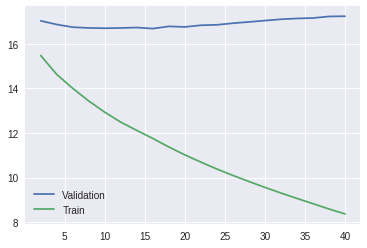

In [0]:
k = np.linspace(2,40,20, dtype = int)
errors_svd_val_sct = {}
errors_svd_train_sct = {}
for i in k:
    errors_svd_val_sct[i] = approx_err(i, sm_u_10_sct_res_val.todense(), U_sct_res, S_sct_res_dia, Vt_sct_res)
    errors_svd_train_sct[i] = approx_err(i, sm_u_10_sct_res_train.todense(), U_sct_res, S_sct_res_dia, Vt_sct_res)

plt.plot(errors_svd_val_sct.keys(),errors_svd_val_sct.values(), label = 'Validation')
plt.plot(errors_svd_train_sct.keys(),errors_svd_train_sct.values(), label = 'Train')
plt.legend()

However the Validation Error increases after each stages in this

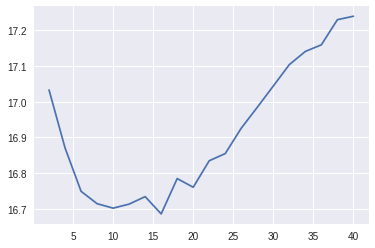

In [0]:
##Separately plotting the Validation error
plt.plot(errors_svd_val_sct.keys(),errors_svd_val_sct.values(), label = 'Validation')

Best Validation MSE for SVD

In [0]:
Best_Val_MSE_SVD_sct = approx_err(16, sm_u_10_sct_res_val.todense(), U_sct_res, S_sct_res_dia, Vt_sct_res)
print('Best Validation MSE for SVD for Restaurants Scottsdale', Best_Val_MSE_SVD_sct)

Best Validation MSE for SVD for Restaurants Scottsdale 16.68550995321838


In [0]:
train_sct_nnz = sm_u_10_sct_res_train.nonzero()
val_sct_nnz = sm_u_10_sct_res_val.nonzero()
test_sct_nnz = sm_u_10_sct_res_test.nonzero()

In [0]:
recon_matrix_svd_sct = np.dot(U_sct_res[:, :15], np.dot(S_sct_res_dia[:15,:15], Vt_sct_res[:15, :]))
train_preds_svd_sct = np.ravel(recon_matrix_svd_sct[train_sct_nnz])
val_preds_svd_sct = np.ravel(recon_matrix_svd_sct[val_sct_nnz])
test_preds_svd_sct = np.ravel(recon_matrix_svd_sct[test_sct_nnz])

## SVD with bias correction

In [0]:
global_bias = np.sum(sm_u_10_phx_res_train)/sm_u_10_phx_res_train.nnz
sm_u_10_phx_res_train_wo_bias = sm_u_10_phx_res_train.todense() - global_bias
U_phx_res_wo_bias, S_phx_res_wo_bias, Vt_phx_res_wo_bias = np.linalg.svd(sm_u_10_phx_res_train_wo_bias)
print("smallest singular value = ",min(S_phx_res_wo_bias))
print("largest singular value = ",max(S_phx_res_wo_bias))
S_phx_res_dia_wo_bias = np.diag(S_phx_res_wo_bias)

smallest singular value =  0.000542870974300842
largest singular value =  8479.053174780665


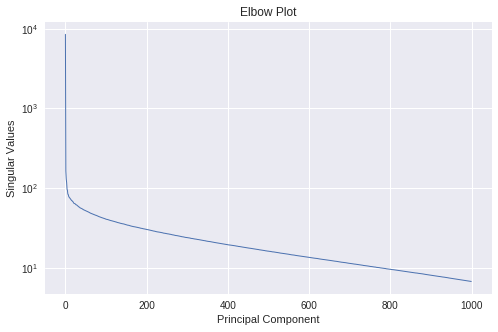

In [0]:
fig = plt.figure(figsize=(8,5))
plt.semilogy(S_phx_res_wo_bias[:1000], '-', linewidth=1)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

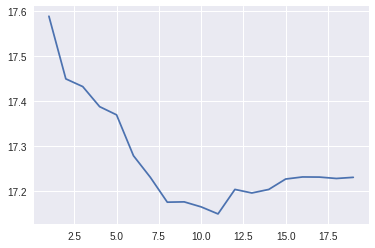

In [0]:
k_wo_bias = np.arange(1,20)
errors_svd_wo_bias = {}
sm_u_10_phx_res_val_wo_bias = sm_u_10_phx_res_val.todense() - global_bias 

for i in k_wo_bias:
    sm_u_10_phx_res_val_wo_bias_rec = np.dot(U_phx_res_wo_bias[:, :i], np.dot(S_phx_res_dia_wo_bias[:i,:i], Vt_phx_res_wo_bias[:i, :]))
    idx_wo_bias = np.where(sm_u_10_phx_res_val.todense()>0);
    diff_wo_bias = sm_u_10_phx_res_val_wo_bias[idx_wo_bias] - sm_u_10_phx_res_val_wo_bias_rec[idx_wo_bias]
    errors_svd_wo_bias[i] = np.linalg.norm(diff_wo_bias)**2/diff_wo_bias.shape[1]
plt.plot(errors_svd_wo_bias.keys(),errors_svd_wo_bias.values())

In [0]:
def find_global_user_res_bias(ratings_matrix):
    dense_matrix = ratings_matrix.todense()
    mask_matrix = (dense_matrix>0).astype(int)
    user_bias = np.sum(dense_matrix, axis = 1)/np.sum(mask_matrix, axis = 1)
    res_bias =  np.sum(dense_matrix, axis = 0)/np.sum(mask_matrix, axis = 0)
    user_bias = np.nan_to_num(user_bias)
    res_bias = np.nan_to_num(res_bias)
    user_bias = user_bias.reshape(-1,1)
    res_bias = res_bias.reshape(1,-1)
    ratings_matrix_wo_bias = dense_matrix - np.tile(user_bias, (1,dense_matrix.shape[1]))- np.tile(res_bias, (dense_matrix.shape[0], 1))
    return user_bias, res_bias, ratings_matrix_wo_bias

## For Restaurants in Phoenix

In [0]:
user_bias_ur, res_bias_ur, train_ur = find_global_user_res_bias(sm_u_10_phx_res_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [0]:
U_phx_res_wo_bias_ur, S_phx_res_wo_bias_ur, Vt_phx_res_wo_bias_ur = np.linalg.svd(train_ur)
print("smallest singular value = ",min(S_phx_res_wo_bias_ur))
print("largest singular value = ",max(S_phx_res_wo_bias_ur))
S_phx_res_dia_wo_bias_ur = np.diag(S_phx_res_wo_bias_ur)

smallest singular value =  0.0005567956297033425
largest singular value =  16446.29467946065


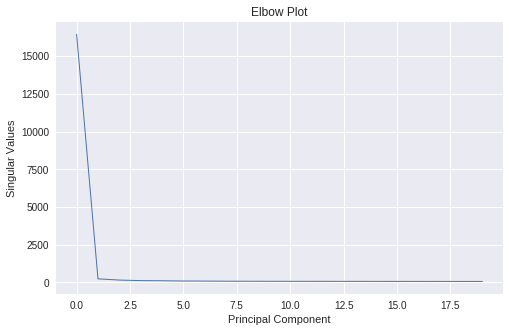

In [0]:
fig = plt.figure(figsize=(8,5))
plt.plot(S_phx_res_wo_bias_ur[:20], '-', linewidth=1)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

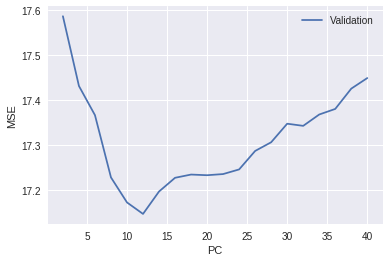

In [0]:
k_wo_bias_ur = np.linspace(2,40,20, dtype = int)
errors_svd_wo_bias_ur = {}
sm_u_10_phx_res_val_wo_bias_ur = sm_u_10_phx_res_val.todense() - user_bias_ur - res_bias_ur

for i in k_wo_bias_ur:
    sm_u_10_phx_res_val_wo_bias_ur_rec = np.dot(U_phx_res_wo_bias_ur[:, :i], np.dot(S_phx_res_dia_wo_bias_ur[:i,:i], Vt_phx_res_wo_bias_ur[:i, :]))
    idx_wo_bias_ur = np.where(sm_u_10_phx_res_val.todense()>0);
    diff_wo_bias_ur = sm_u_10_phx_res_val_wo_bias_ur[idx_wo_bias_ur] - sm_u_10_phx_res_val_wo_bias_ur_rec[idx_wo_bias_ur]
    errors_svd_wo_bias_ur[i] = np.linalg.norm(diff_wo_bias_ur)**2/diff_wo_bias_ur.shape[1]
plt.plot(errors_svd_wo_bias_ur.keys(),errors_svd_wo_bias_ur.values(), label= 'Validation')
plt.xlabel('PC')
plt.ylabel('MSE')
plt.legend()

## For Restaurants in Scottsdale

In [0]:
user_bias_ur_sct, res_bias_ur_sct, train_ur_sct = find_global_user_res_bias(sm_u_10_sct_res_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [0]:
U_sct_res_wo_bias_ur, S_sct_res_wo_bias_ur, Vt_sct_res_wo_bias_ur = np.linalg.svd(train_ur_sct)
print("smallest singular value = ",min(S_sct_res_wo_bias_ur))
print("largest singular value = ",max(S_sct_res_wo_bias_ur))
S_sct_res_dia_wo_bias_ur = np.diag(S_sct_res_wo_bias_ur)

smallest singular value =  6.500617890976148e-13
largest singular value =  7190.986814142587


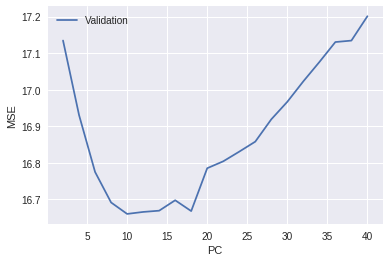

In [0]:
k_wo_bias_ur = np.linspace(2,40,20, dtype = int)
errors_svd_wo_bias_ur_sct = {}
sm_u_10_sct_res_val_wo_bias_ur = sm_u_10_sct_res_val.todense() - user_bias_ur_sct - res_bias_ur_sct

for i in k_wo_bias_ur:
    sm_u_10_sct_res_val_wo_bias_ur_rec = np.dot(U_sct_res_wo_bias_ur[:, :i], np.dot(S_sct_res_dia_wo_bias_ur[:i,:i], Vt_sct_res_wo_bias_ur[:i, :]))
    idx_wo_bias_ur_sct = np.where(sm_u_10_sct_res_val.todense()>0);
    diff_wo_bias_ur_sct = sm_u_10_sct_res_val_wo_bias_ur[idx_wo_bias_ur_sct] - sm_u_10_sct_res_val_wo_bias_ur_rec[idx_wo_bias_ur_sct]
    errors_svd_wo_bias_ur_sct[i] = np.linalg.norm(diff_wo_bias_ur_sct)**2/diff_wo_bias_ur_sct.shape[1]
plt.plot(errors_svd_wo_bias_ur_sct.keys(),errors_svd_wo_bias_ur_sct.values(), label = 'Validation')
plt.xlabel('PC')
plt.ylabel('MSE')
plt.legend()


## 3.2 Cosine Similarity with correction for bias

In [0]:
def similarity_matrix(train_matrix, between = 'users'):
    '''Returns the cosine similarity between users or restaurants'''
    if between == 'users':
        similarity = train_matrix*train_matrix.transpose()
    else:
        similarity = train_matrix.transpose()*train_matrix
    similarity_dense = similarity.todense() + 1e-8
    norm_array = np.sqrt(np.diag(similarity_dense))
    return similarity_dense/norm_array/norm_array.reshape(-1,1)

In [0]:
def predict_topk_nobias(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        user_bias = np.mean(ratings, axis =1)
        ratings = (ratings - np.tile(user_bias, (ratings.shape[1],1)).T).copy()
        for i in range(ratings.shape[0]):
            top_k_users = np.argsort(similarity[:,i])[:-k-1:-1]
            pred[i] = np.dot(similarity[i,top_k_users],ratings[top_k_users,:])/np.sum(np.abs(similarity[i,top_k_users]))
        pred += np.tile(user_bias,(ratings.shape[1],1)).T
    else:
        item_bias = np.mean(ratings, axis=0)
        ratings = (ratings - np.tile(item_bias,(ratings.shape[0],1))).copy()
        for j in range(ratings.shape[1]):
            top_k_items = np.argsort(similarity[:,j])[:-k-1:-1]
            pred[:,j] = np.dot(similarity[top_k_items,j].T,ratings[:,top_k_items].T)/np.sum(np.abs(similarity[top_k_items,j]))
        pred += np.tile(item_bias,(ratings.shape[0],1))
        
    return pred

In [0]:
def get_mse(pred, actual):
    # Ignore zero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [0]:
simi_phx_res = similarity_matrix(sm_u_10_phx_res_train, between='res')
simi_phx_res = np.array(simi_phx_res)
preds_cosine_phx = predict_topk_nobias(np.array(sm_u_10_phx_res_train.todense()),simi_phx_res,kind='res', k=1)
MSE_cosine_res = get_mse(preds_cosine_phx, np.array(sm_u_10_phx_res_val.todense()))
print("MSE for cosine Similarity between Restaurants =",MSE_cosine_res)

MSE for cosine Similarity between Restaurants = 18.736972704714642


In [0]:
simi_phx_users = similarity_matrix(sm_u_10_phx_res_train, between='users')
simi_phx_users = np.array(simi_phx_users)
preds_cosine_phx_users = predict_topk_nobias(np.array(sm_u_10_phx_res_train.todense()),simi_phx_users,kind='user', k=1)
MSE_cosine_users = get_mse(preds_cosine_phx_users, np.array(sm_u_10_phx_res_val.todense()))
print("MSE for cosine Similarity between Users =",MSE_cosine_users)

MSE for cosine Similarity between Users = 18.736972704714642


## For Restaurants in Phoenix

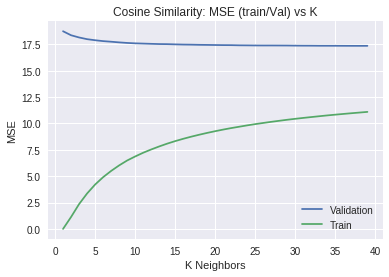

In [0]:
errors_cs_res_phx_val = {}
errors_cs_res_phx_train = {}
k_cs = np.arange(1, 40)
for i in k_cs:
    preds_cs_res_phx = predict_topk_nobias(np.array(sm_u_10_phx_res_train.todense()),simi_phx_res,kind='res', k=i)
    error_cs_val = get_mse(preds_cs_res_phx, np.array(sm_u_10_phx_res_val.todense()))
    error_cs_train = get_mse(preds_cs_res_phx, np.array(sm_u_10_phx_res_train.todense()))
    errors_cs_res_phx_val[i] = error_cs_val
    errors_cs_res_phx_train[i] = error_cs_train
plt.plot(errors_cs_res_phx_val.keys(),errors_cs_res_phx_val.values(), label = 'Validation')
plt.plot(errors_cs_res_phx_train.keys(),errors_cs_res_phx_train.values(), label = 'Train')
plt.xlabel('K Neighbors')
plt.ylabel('MSE')
plt.title('Cosine Similarity: MSE (train/Val) vs K')
plt.legend()

In [0]:
preds_cosine_phx = predict_topk_nobias(np.array(sm_u_10_phx_res_train.todense()),simi_phx_res,kind='res', k=40)
Best_Val_MSE_Cosine_phx = get_mse(preds_cosine_phx, np.array(sm_u_10_phx_res_val.todense()))
print('Best Validation MSE for Cosine Similarity for Restaurants in Phoenix= ', Best_Val_MSE_Cosine_phx)

Best Validation MSE for Cosine Similarity for Restaurants in Phoenix=  17.35093854739503


In [0]:
train_preds_cosine_phx = preds_cosine_phx[train_phx_nnz]
val_preds_cosine_phx = preds_cosine_phx[val_phx_nnz]
test_preds_cosine_phx = preds_cosine_phx[test_phx_nnz]

## For Restaurants in Scottsdale

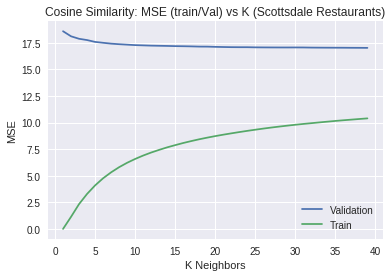

In [0]:
errors_cs_res_sct_val = {}
errors_cs_res_sct_train = {}
k_cs = np.arange(1, 40)
simi_sct_res = similarity_matrix(sm_u_10_sct_res_train, between='res')
simi_sct_res = np.array(simi_sct_res)
for i in k_cs:
    preds_cs_res_sct = predict_topk_nobias(np.array(sm_u_10_sct_res_train.todense()),simi_sct_res,kind='res', k=i)
    error_cs_val = get_mse(preds_cs_res_sct, np.array(sm_u_10_sct_res_val.todense()))
    error_cs_train = get_mse(preds_cs_res_sct, np.array(sm_u_10_sct_res_train.todense()))
    errors_cs_res_sct_val[i] = error_cs_val
    errors_cs_res_sct_train[i] = error_cs_train
plt.plot(errors_cs_res_sct_val.keys(),errors_cs_res_sct_val.values(), label = 'Validation')
plt.plot(errors_cs_res_sct_train.keys(),errors_cs_res_sct_train.values(), label = 'Train')
plt.xlabel('K Neighbors')
plt.ylabel('MSE')
plt.title('Cosine Similarity: MSE (train/Val) vs K (Scottsdale Restaurants)')
plt.legend()

In [0]:
preds_cosine_sct = predict_topk_nobias(np.array(sm_u_10_sct_res_train.todense()),simi_sct_res,kind='res', k=40)
Best_Val_MSE_Cosine_sct = get_mse(preds_cosine_sct, np.array(sm_u_10_sct_res_val.todense()))
print('Best Validation MSE for Cosine Similarity for Restaurants in Scottsdale= ', Best_Val_MSE_Cosine_sct)

Best Validation MSE for Cosine Similarity for Restaurants in Scottsdale=  17.025866680642704


In [0]:
train_preds_cosine_sct = preds_cosine_sct[train_sct_nnz]
val_preds_cosine_sct = preds_cosine_sct[val_sct_nnz]
test_preds_cosine_sct = preds_cosine_sct[test_sct_nnz]


## 3.3 ALS:

In [0]:
def als(ratings_matrix, k=40, user_reg=0, res_reg=0, iters=10):
    '''Performs ALS for a given ratings_matrix and returns predictions using the latent vector representation User (U x K) and Restaurant (R x K)'''
    ratings_matrix = ratings_matrix.T
    user_vec = np.random.rand(ratings_matrix.shape[1],k).T
    res_vec = np.random.rand(ratings_matrix.shape[0],k).T
    for i in range(iters):
        for u in range(ratings_matrix.shape[1]):
            user_vec[:,u] = np.linalg.solve(np.dot(res_vec,res_vec.T) + user_reg * np.eye(res_vec.shape[0]), np.dot(res_vec,ratings_matrix[:,u]))
        for r in range(ratings_matrix.shape[0]):
            res_vec[:,r] = np.linalg.solve(np.dot(user_vec,user_vec.T) + res_reg * np.eye(user_vec.shape[0]), np.dot(user_vec,ratings_matrix[r,:].T))
        prediction = np.dot(res_vec.T, user_vec)
#         error = np.mean((ratings_matrix - prediction)**2)
    return np.dot(res_vec.T, user_vec).T

## For Restaurants in Phoenix

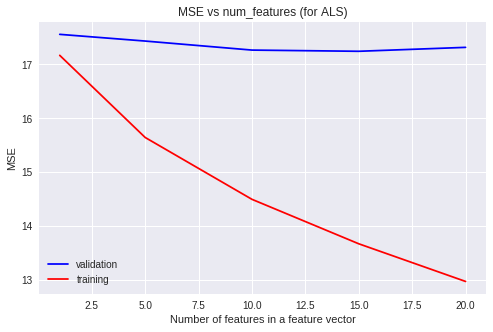

In [0]:

num_features = np.linspace(1,20,5,dtype=int)
test_error_als = []
train_error_als = []
for i in num_features:
    preds_als = als(np.array(sm_u_10_phx_res_train.todense()), k=i, iters = 5)
    test_err = get_mse(preds_als, np.array(sm_u_10_phx_res_val.todense()))
    train_err = get_mse(preds_als, np.array(sm_u_10_phx_res_train.todense()))
    test_error_als.append(test_err)
    train_error_als.append(train_err)

fig = plt.figure(figsize=(8,5))
plt.plot(num_features,test_error_als,'b-',label = 'validation')
plt.plot(num_features,train_error_als,'r-', label = 'training')
plt.title('MSE vs num_features (for ALS)')
plt.xlabel('Number of features in a feature vector')
plt.ylabel('MSE')
plt.legend()

Text(0, 0.5, 'MSE')

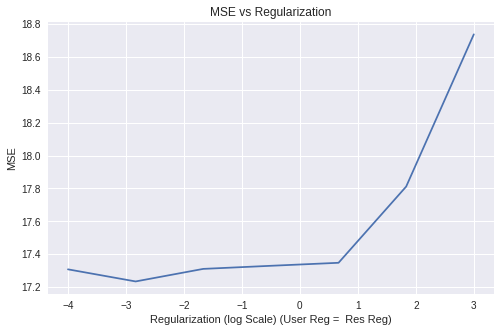

In [0]:
user_reg= np.logspace(-4,3,7)
val_error_als = {}
# train_error_als = {}
fig = plt.figure(figsize=(8,5))
for i in user_reg:
    val_error_als[i] = []
    preds_als = als(np.array(sm_u_10_phx_res_train.todense()),k=10, iters = 5, user_reg=i, res_reg=i)
    val_err = get_mse(preds_als, np.array(sm_u_10_phx_res_val.todense()))
#         train_err = get_mse(preds_als, np.array(train.todense()))
    val_error_als[i].append(val_err)
#         train_error_als[i].append(train_err)
plt.plot(np.log10(user_reg),val_error_als.values())
#     plt.plot(np.log(res_reg),train_error_als[i], label = 'User_reg = '+ str(i))


plt.title('MSE vs Regularization')
plt.xlabel('Regularization (log Scale) (User Reg =  Res Reg)')
plt.ylabel('MSE')

In [0]:
preds_als_phx = als(np.array(sm_u_10_phx_res_train.todense()),k=10, iters = 5, user_reg=0.001 , res_reg=0.001)
Best_Val_MSE_als_phx = get_mse(preds_als_phx, np.array(sm_u_10_phx_res_val.todense()))
print('Best Validation MSE for ALS for Restaurants in Phoenix= ', Best_Val_MSE_als_phx)

Best Validation MSE for ALS for Restaurants in Phoenix=  17.230543322467152


In [0]:
train_preds_als_phx = preds_als_phx[train_phx_nnz]
val_preds_als_phx = preds_als_phx[val_phx_nnz]
test_preds_als_phx = preds_als_phx[test_phx_nnz]

## For Restaurants in Scottsdale

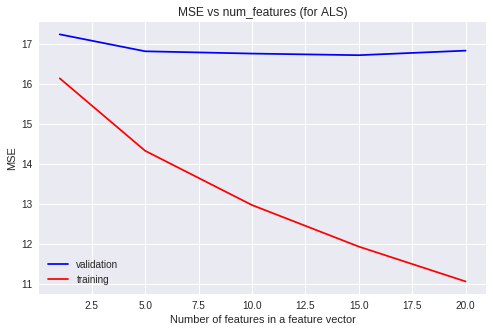

In [0]:
num_features = np.linspace(1,20,5,dtype=int)
test_error_als_sct = []
train_error_als_sct = []
for i in num_features:
    preds_als = als(np.array(sm_u_10_sct_res_train.todense()), k=i, iters = 5)
    test_err = get_mse(preds_als, np.array(sm_u_10_sct_res_val.todense()))
    train_err = get_mse(preds_als, np.array(sm_u_10_sct_res_train.todense()))
    test_error_als_sct.append(test_err)
    train_error_als_sct.append(train_err)

fig = plt.figure(figsize=(8,5))
plt.plot(num_features,test_error_als_sct,'b-',label = 'validation')
plt.plot(num_features,train_error_als_sct,'r-', label = 'training')
plt.title('MSE vs num_features (for ALS)')
plt.xlabel('Number of features in a feature vector')
plt.ylabel('MSE')
plt.legend()

Text(0, 0.5, 'MSE')

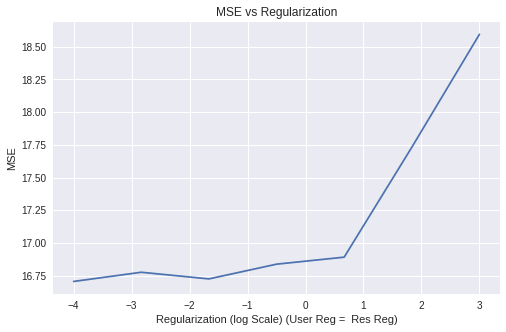

In [0]:
user_reg= np.logspace(-4,3,7)
val_error_als = {}
# train_error_als = {}
fig = plt.figure(figsize=(8,5))
for i in user_reg:
    val_error_als[i] = []
    preds_als = als(np.array(sm_u_10_sct_res_train.todense()),k=10, iters = 5, user_reg=i, res_reg=i)
    val_err = get_mse(preds_als, np.array(sm_u_10_sct_res_val.todense()))
#         train_err = get_mse(preds_als, np.array(train.todense()))
    val_error_als[i].append(val_err)
#         train_error_als[i].append(train_err)
plt.plot(np.log10(user_reg),val_error_als.values())
#     plt.plot(np.log(res_reg),train_error_als[i], label = 'User_reg = '+ str(i))


plt.title('MSE vs Regularization')
plt.xlabel('Regularization (log Scale) (User Reg =  Res Reg)')
plt.ylabel('MSE')

In [0]:
preds_als_sct = als(np.array(sm_u_10_sct_res_train.todense()),k=10, iters = 5, user_reg=0.01, res_reg=0.01)
Best_Val_MSE_als_sct = get_mse(preds_als_sct, np.array(sm_u_10_sct_res_val.todense()))
print('Best Validation MSE for ALS for Restaurants in Scottsdale= ', Best_Val_MSE_als_sct)

Best Validation MSE for ALS for Restaurants in Scottsdale=  16.729128335518105


In [0]:
train_preds_als_sct = preds_als_sct[train_sct_nnz]
val_preds_als_sct = preds_als_sct[val_sct_nnz]
test_preds_als_sct = preds_als_sct[test_sct_nnz]


## 3.4 SGD with bias correction

In [0]:
def sgd(ratings, k=40, user_bias_reg = 0.01, res_bias_reg = 0.01, user_vec_reg = 0.01, res_vec_reg = 0.01, lr = 1e-3, 
       iterations = 200):
    '''Learn user and res biases along with latent vectors'''
    error_array = np.zeros(iterations);
    global_bias = np.mean(ratings[np.where(ratings)!=0])
    user_bias = 0.1*(2*(np.random.rand(ratings.shape[0]))-1)
    res_bias = 0.1*(2*(np.random.rand(ratings.shape[1]))-1)
    user_vec = 0.1*(2*(np.random.rand(ratings.shape[0],k))-1)
    res_vec = 0.1*(2*(np.random.rand(ratings.shape[1],k))-1)
    training_idx = np.arange(ratings.nonzero()[0].shape[0])
    np.random.shuffle(training_idx)
    nz_rows_idx = ratings.nonzero()[0]
    nz_cols_idx = ratings.nonzero()[1]
    for i in range(iterations):
    
#         if(i%20 == 0):
#             print('Iteration number: ', i)
        lr = 1.0/(100 + 0.01*i)
        np.random.shuffle(training_idx)
        
        temp_error_array = np.zeros(len(training_idx));
        for datapoint_i, idx in enumerate(training_idx):
            u = nz_rows_idx[idx]
            r = nz_cols_idx[idx]
            prediction = global_bias + user_bias[u] + res_bias[r] + np.dot(user_vec[u,:], res_vec[r,:].T)
            e = (ratings[u,r] - prediction);
            temp_error_array[datapoint_i] += e**2;
            if i > 0:
                user_bias[u] += lr * (e - user_bias_reg * user_bias[u])
                res_bias[r] += lr * (e - res_bias_reg * res_bias[r])
                user_vec[u,:] += lr * (e * res_vec[r,:] - user_vec_reg * user_vec[u,:])
                res_vec[r,:] += lr * (e * user_vec[u,:] - res_vec_reg * res_vec[r,:])
            
        error_array[i] = np.mean(temp_error_array);
#         print(error_array[i])
            
    predictions = global_bias + user_bias[:, np.newaxis] + res_bias[np.newaxis, :] + np.dot(user_vec, res_vec.T)
    predictions[predictions > 5] = 5
    predictions[predictions < 0] = 0
    
    return (predictions, error_array, user_vec, res_vec)

**Tuning the Iters hyper-parameter**
## For Restaurants in Phoenix

iters =  10
iters =  20
iters =  30
iters =  40


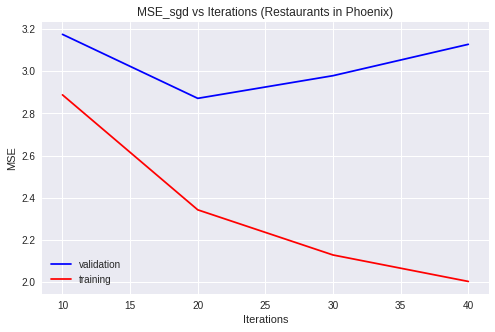

In [0]:
iters = np.arange(10, 50, 10)
err_sgd_test = []
err_sgd_train = []
for i in iters:
    print('iters = ',i)
    preds_sgd = sgd(np.array(sm_u_10_phx_res_train.todense()), k=10, iterations= i)
    err_test = get_mse(preds_sgd[0], np.array(sm_u_10_phx_res_val.todense()))
    err_train = get_mse(preds_sgd[0], np.array(sm_u_10_phx_res_train.todense()))
    err_sgd_test.append(err_test)
    err_sgd_train.append(err_train)
fig = plt.figure(figsize=(8,5))
plt.plot(iters,err_sgd_test,'b-',label = 'validation')
plt.plot(iters,err_sgd_train,'r-', label = 'training')
plt.title('MSE_sgd vs Iterations (Restaurants in Phoenix)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()

k =  2
k =  3
k =  4
k =  6
k =  7
k =  9
k =  10
k =  12
k =  13
k =  15


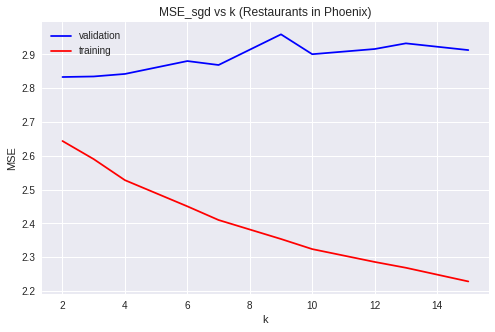

In [0]:
k = np.linspace(2, 15, 10, dtype = int)
err_sgd_test = []
err_sgd_train = []
for i in k:
    print('k = ', i)
    preds_sgd = sgd(np.array(sm_u_10_phx_res_train.todense()), k=i, iterations= 20)
    err_test = get_mse(preds_sgd[0], np.array(sm_u_10_phx_res_val.todense()))
    err_train = get_mse(preds_sgd[0], np.array(sm_u_10_phx_res_train.todense()))
    err_sgd_test.append(err_test)
    err_sgd_train.append(err_train)
fig = plt.figure(figsize=(8,5))
plt.plot(k,err_sgd_test,'b-',label = 'validation')
plt.plot(k,err_sgd_train,'r-', label = 'training')
plt.title('MSE_sgd vs k (Restaurants in Phoenix)')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()

In [0]:
predictions_sgd_phx, error_array_sgd_phx, user_vec_sgd_phx, res_vec_sgd_phx = sgd(np.array(sm_u_10_phx_res_train.todense()), k=2, iterations= 20)

In [0]:
preds_sgd_phx = sgd(np.array(sm_u_10_phx_res_train.todense()),k=2, iterations= 20)
Best_Val_MSE_sgd_phx = get_mse(preds_sgd_phx[0], np.array(sm_u_10_phx_res_val.todense()))
print('Best Validation MSE for SGD for Restaurants in Phoenix= ', Best_Val_MSE_sgd_phx)

Best Validation MSE for SGD for Restaurants in Phoenix=  2.8545074083478035


In [0]:
train_preds_sgd_phx = preds_sgd_phx[0][train_phx_nnz]
val_preds_sgd_phx = preds_sgd_phx[0][val_phx_nnz]
test_preds_sgd_phx = preds_sgd_phx[0][test_phx_nnz]

## For Restaurants in Scottsdale

iters =  10
iters =  20
iters =  30
iters =  40


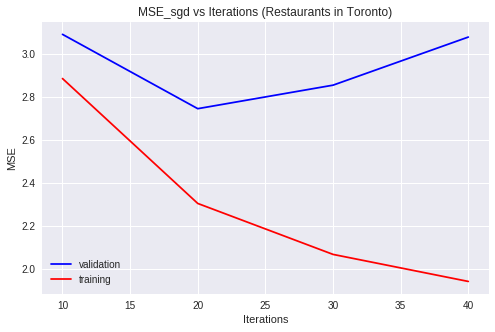

In [0]:
iters = np.arange(10, 50, 10)
err_sgd_test_sct = []
err_sgd_train_sct = []
for i in iters:
    print('iters = ',i)
    preds_sgd = sgd(np.array(sm_u_10_sct_res_train.todense()), k=10, iterations= i)
    err_test = get_mse(preds_sgd[0], np.array(sm_u_10_sct_res_val.todense()))
    err_train = get_mse(preds_sgd[0], np.array(sm_u_10_sct_res_train.todense()))
    err_sgd_test_sct.append(err_test)
    err_sgd_train_sct.append(err_train)
fig = plt.figure(figsize=(8,5))
plt.plot(iters,err_sgd_test_sct,'b-',label = 'validation')
plt.plot(iters,err_sgd_train_sct,'r-', label = 'training')
plt.title('MSE_sgd vs Iterations (Restaurants in Toronto)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()

**Optimal Number of Iterations = 30**

k= 2
k= 3
k= 4
k= 6
k= 7
k= 9
k= 10
k= 12
k= 13
k= 15


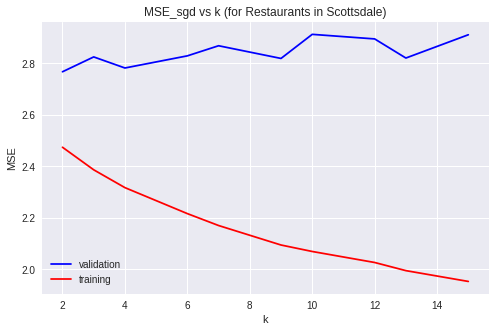

In [0]:
k = np.linspace(2, 15, 10, dtype = int)
err_sgd_val_sct = []
err_sgd_train_sct = []
for i in k:
    print('k=', i)
    preds_sgd = sgd(np.array(sm_u_10_sct_res_train.todense()), k=i, iterations= 30)
    err_val = get_mse(preds_sgd[0], np.array(sm_u_10_sct_res_val.todense()))
    err_train = get_mse(preds_sgd[0], np.array(sm_u_10_sct_res_train.todense()))
    err_sgd_val_sct.append(err_val)
    err_sgd_train_sct.append(err_train)
fig = plt.figure(figsize=(8,5))
plt.plot(k,err_sgd_val_sct,'b-',label = 'validation')
plt.plot(k,err_sgd_train_sct,'r-', label = 'training')
plt.title('MSE_sgd vs k (for Restaurants in Scottsdale)')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()

**Optimal k value = 2**

In [0]:
predictions_sgd_sct, error_array_sgd_sct, user_vec_sgd_sct, res_vec_sgd_sct = sgd(np.array(sm_u_10_sct_res_train.todense()), k=2, iterations= 30)

In [0]:
preds_sgd_sct = sgd(np.array(sm_u_10_sct_res_train.todense()),k=2, iterations=30)
Best_Val_MSE_sgd_sct = get_mse(preds_sgd_sct[0], np.array(sm_u_10_sct_res_val.todense()))
print('Best Validation MSE for SGD for Restaurants in Scottsdale= ', Best_Val_MSE_sgd_sct)

Best Validation MSE for SGD for Restaurants in Scottsdale=  2.7363082502586065


In [0]:
train_preds_sgd_sct = preds_sgd_sct[0][train_sct_nnz]
val_preds_sgd_sct = preds_sgd_sct[0][val_sct_nnz]
test_preds_sgd_sct = preds_sgd_sct[0][test_sct_nnz]

## Converting the Matrix Completion Problem into a Regression Problem

In [0]:
import pickle
def concatenated_SGD(U, V, matrix):
    '''Concatenates the User Vector U (n_u x k) and Res Vector V (n_r x K) and returns a matrix of \ 
    2k+1 x number of non-zero ratings in rating matrix (matrix)'''
    indexes=matrix.nonzero()
    users=U[indexes[0]]
    rest=V[indexes[1]]
    ratings=matrix[indexes].T
    concat_sgd=np.concatenate((users,rest,ratings),axis=1)
    return concat_sgd

## For Restaurants in Phoenix

In [0]:
train_phx = concatenated_SGD(user_vec_sgd_phx, res_vec_sgd_phx, sm_u_10_phx_res_train)
val_phx = concatenated_SGD(user_vec_sgd_phx, res_vec_sgd_phx, sm_u_10_phx_res_val)
test_phx = concatenated_SGD(user_vec_sgd_phx, res_vec_sgd_phx, sm_u_10_phx_res_test)

## Random Forest Regressor
## For Restaurants in Phoenix

In [0]:
train_mat_phx = np.array(train_phx);
val_mat_phx = np.array(val_phx);
test_mat_phx = np.array(test_phx);
x_train, y_train = train_mat_phx[:, :-1], np.ravel(train_mat_phx[:,-1]);
x_val, y_val = val_mat_phx[:, :-1], np.ravel(val_mat_phx[:, -1])

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=5)
rf.fit(train_mat_phx[:,:4],train_mat_phx[:,4])
preds_rf_phx=rf.predict(val_mat_phx[:,:4]).reshape(-1,1)
MSE_rf_phx = get_mse(preds_rf_phx, val_mat_phx[:,4])
print('MSE for Random Forest Classifier for Restaurants in Phoenix = ', MSE_rf_phx)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE for Random Forest Classifier for Restaurants in Phoenix =  2.710045376922961


In [0]:
train_preds_rf_phx = rf.predict(train_mat_phx[:,:4])
val_preds_rf_phx = rf.predict(val_mat_phx[:,:4])
test_preds_rf_phx = rf.predict(test_mat_phx[:,:4])

## For Restaurants in Scottsdale

In [0]:
train_sct = concatenated_SGD(user_vec_sgd_sct, res_vec_sgd_sct, sm_u_10_sct_res_train)
val_sct = concatenated_SGD(user_vec_sgd_sct, res_vec_sgd_sct, sm_u_10_sct_res_val)
test_sct = concatenated_SGD(user_vec_sgd_sct, res_vec_sgd_sct, sm_u_10_sct_res_test)
train_mat_sct = np.array(train_sct);
val_mat_sct = np.array(val_sct);
test_mat_sct = np.array(test_sct);

In [0]:
x_train, y_train = train_mat_sct[:, :-1], np.ravel(train_mat_sct[:,-1]);
x_val, y_val = val_mat_sct[:, :-1], np.ravel(val_mat_sct[:, -1])

In [0]:
rf_sct = RandomForestRegressor(max_depth=5)
rf.fit(train_mat_sct[:,:4],train_mat_sct[:,4])
preds_rf_sct = rf.predict(val_mat_sct[:,:4]).reshape(-1,1)
MSE_rf_sct = get_mse(preds_rf_sct, val_mat_sct[:,4])
print('MSE for Random Forest Classifier for Restaurants in Scottsdale = ', MSE_rf_sct)

MSE for Random Forest Classifier for Restaurants in Scottsdale =  2.6717940609972395


In [0]:
train_preds_rf_sct = rf.predict(train_mat_sct[:,:4])
val_preds_rf_sct = rf.predict(val_mat_sct[:,:4])
test_preds_rf_sct = rf.predict(test_mat_sct[:,:4])

## Ensemble of all the Predictors (SVD, Cosine Model, ALS, SGD, RF)

In [0]:
train_preds_svd_phx.shape

(37321,)

In [0]:
def build_ensemble_df(svd, cosine,als, sgd, rf):
    df =pd.DataFrame(svd)
    df.columns = ['SVD']
    df['Cosine'] = cosine
    df['ALS'] = als
    df['SGD'] = sgd
    df['Random Forest'] = rf
    return df

In [0]:
ensemble_training_phx_df = build_ensemble_df(train_preds_svd_phx,train_preds_cosine_phx, train_preds_als_phx, train_preds_sgd_phx, train_preds_rf_phx)
ensemble_validation_phx_df = build_ensemble_df(val_preds_svd_phx,val_preds_cosine_phx, val_preds_als_phx, val_preds_sgd_phx, val_preds_rf_phx)
ensemble_testing_phx_df = build_ensemble_df(test_preds_svd_phx,test_preds_cosine_phx, test_preds_als_phx, test_preds_sgd_phx, test_preds_rf_phx)

In [0]:
y_train_phx = np.ravel(np.array(sm_u_10_phx_res_train[train_phx_nnz]))
y_val_phx = np.ravel(np.array(sm_u_10_phx_res_val[val_phx_nnz]))
y_test_phx = np.ravel(np.array(sm_u_10_phx_res_test[test_phx_nnz]))

In [0]:
ensemble_training_sct_df = build_ensemble_df(train_preds_svd_sct,train_preds_cosine_sct, train_preds_als_sct, train_preds_sgd_sct, train_preds_rf_sct)
ensemble_validation_sct_df = build_ensemble_df(val_preds_svd_sct,val_preds_cosine_sct, val_preds_als_sct, val_preds_sgd_sct, val_preds_rf_sct)
ensemble_testing_sct_df = build_ensemble_df(test_preds_svd_sct,test_preds_cosine_sct, test_preds_als_sct, test_preds_sgd_sct, test_preds_rf_sct)

In [0]:
y_train_sct = np.ravel(np.array(sm_u_10_sct_res_train[train_sct_nnz]))
y_val_sct = np.ravel(np.array(sm_u_10_sct_res_val[val_sct_nnz]))
y_test_sct = np.ravel(np.array(sm_u_10_sct_res_test[test_sct_nnz]))

In [0]:
from sklearn.linear_model import LinearRegression

## For Restaurants in Phoenix

In [0]:
lr_phx = LinearRegression(fit_intercept=True)
lr_phx.fit(ensemble_training_phx_df.iloc[:,-3:], y_train_phx)
ensemble_val_pred_phx = lr_phx.predict(ensemble_validation_phx_df.iloc[:,-3:])
MSE_ensemble_phx = get_mse(ensemble_val_pred_phx,y_val_phx)
print('MSE of the ensemble of Models for restaurants in Phoenix = ', MSE_ensemble_phx)

MSE of the ensemble of Models for restaurants in Phoenix =  2.8581335434488757


**Ridge Regression with high penalty**

In [0]:
from sklearn.linear_model import Ridge
lrr_phx = Ridge(alpha = 10000)
lrr_phx.fit(ensemble_training_phx_df.iloc[:,-3:], y_train_phx)
ensemble_val_pred_phx = lrr_phx.predict(ensemble_validation_phx_df.iloc[:,-3:])
MSE_ensemble_phx = get_mse(ensemble_val_pred_phx,y_val_phx)
print('MSE of the ensemble of Models for restaurants in Phoenix = ', MSE_ensemble_phx)

MSE of the ensemble of Models for restaurants in Phoenix =  2.6333817860275097


## For Restaurants in Scottsdalle

In [0]:
lr_sct = LinearRegression(fit_intercept=True)
lr_sct.fit(ensemble_training_sct_df.iloc[:,-3:], y_train_sct)
ensemble_val_pred_sct = lr_sct.predict(ensemble_validation_sct_df.iloc[:,-3:])
MSE_ensemble_sct = get_mse(ensemble_val_pred_sct,y_val_sct)
print('MSE of the ensemble of Models for restaurants in Scottsdalle = ', MSE_ensemble_sct)

MSE of the ensemble of Models for restaurants in Scottsdalle =  2.8199476688267002


**Ridge Regression with high penalty**

In [0]:
lrr_sct = Ridge(alpha = 10000)
lrr_sct.fit(ensemble_training_sct_df.iloc[:,-3:], y_train_sct)
ensemble_val_pred_sct = lrr_sct.predict(ensemble_validation_sct_df.iloc[:,-3:])
MSE_ensemble_sct = get_mse(ensemble_val_pred_sct,y_val_sct)
print('MSE of the ensemble of Models for restaurants in Scottsdalle = ', MSE_ensemble_sct)

MSE of the ensemble of Models for restaurants in Scottsdalle =  2.5183558867860882


# 4. Testing the best model on the test data and checking the test accuracy
## For the restaurants in Phoenix and Scottsdalle, the best model was the ensemble model.

In [0]:
ensemble_test_pred_phx = lrr_phx.predict(ensemble_testing_phx_df.iloc[:,-3:])
MSE_test_phx = get_mse(ensemble_test_pred_phx,y_test_phx)
print('MSE of the ensemble of Models for restaurants in Phoenix (test) = ', MSE_test_phx)

MSE of the ensemble of Models for restaurants in Phoenix (test) =  2.516408382298725


In [0]:
ensemble_test_pred_sct = lrr_sct.predict(ensemble_testing_sct_df.iloc[:,-3:])
MSE_test_sct = get_mse(ensemble_test_pred_sct,y_test_sct)
print('MSE of the ensemble of Models for restaurants in Scottsdalle (test) = ', MSE_test_sct)

MSE of the ensemble of Models for restaurants in Scottsdalle (test) =  3.274722986480964
